# Covid 19 Analysis
**Data by** Nexoid

**Author** Vishal Sharma

NB: Built from scratch, no other references required

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
%matplotlib inline

## Data processing

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/master_dataset.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,9,12,13,14,15,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [47]:
pd.set_option('display.max_rows', None)
data.head()

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,bmi,blood_type,insurance,income,race,immigrant,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,public_transport_count,working,worried,rate_reducing_risk_single,rate_reducing_risk_single_social_distancing,rate_reducing_risk_single_washing_hands,rate_reducing_risk_house,rate_reducing_risk_house_social_distancing,rate_reducing_risk_house_washing_hands,rate_reducing_risk_single_sanitizer,rate_reducing_mask,rate_reducing_mask_type,rate_government_action,rate_government_control,rate_government_spend,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality
2020-03-25,NaN,CA,43.7597,-79.2985,100.0,male,20_30,178,88,27.7,bn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050,NaN
2020-03-26,NaN,CA,51.1443,-114.0953,5.0,female,30_40,158,54,21.6,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050,NaN
2020-03-25,NaN,CA,43.2322,-79.8854,100.0,male,90_100,184,94,27.7,an,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,NaN,NaN,NaN,12.0,14.701,NaN
2020-03-25,NaN,CA,45.6766,-73.8329,5.0,male,60_70,172,96,32.4,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,NaN,NaN,NaN,6.0,2.250,NaN
2020-03-26,NaN,CA,49.1839,-123.1285,1.0,male,30_40,166,70,25.4,abp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050,NaN


In [48]:
data = data.shift(1, axis = 1) 

In [49]:
data['survey_date'] = data.index

In [50]:
data['ID'] = range(1, len(data) + 1)

In [51]:
data.head()

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,bmi,blood_type,insurance,income,race,immigrant,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,public_transport_count,working,worried,rate_reducing_risk_single,rate_reducing_risk_single_social_distancing,rate_reducing_risk_single_washing_hands,rate_reducing_risk_house,rate_reducing_risk_house_social_distancing,rate_reducing_risk_house_washing_hands,rate_reducing_risk_single_sanitizer,rate_reducing_mask,rate_reducing_mask_type,rate_government_action,rate_government_control,rate_government_spend,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality,ID
2020-03-25,2020-03-25,NaN,CA,43.7597,-79.2985,100.0,male,20_30,178,88,27.7,bn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050,1
2020-03-26,2020-03-26,NaN,CA,51.1443,-114.0953,5.0,female,30_40,158,54,21.6,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050,2
2020-03-25,2020-03-25,NaN,CA,43.2322,-79.8854,100.0,male,90_100,184,94,27.7,an,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,NaN,NaN,NaN,12.0,14.701,3
2020-03-25,2020-03-25,NaN,CA,45.6766,-73.8329,5.0,male,60_70,172,96,32.4,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,NaN,NaN,NaN,6.0,2.250,4
2020-03-26,2020-03-26,NaN,CA,49.1839,-123.1285,1.0,male,30_40,166,70,25.4,abp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,0.050,5


In [52]:
data.index = data['ID']

In [53]:
data.tail()

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,bmi,blood_type,insurance,income,race,immigrant,smoking,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,public_transport_count,working,worried,rate_reducing_risk_single,rate_reducing_risk_single_social_distancing,rate_reducing_risk_single_washing_hands,rate_reducing_risk_house,rate_reducing_risk_house_social_distancing,rate_reducing_risk_house_washing_hands,rate_reducing_risk_single_sanitizer,rate_reducing_mask,rate_reducing_mask_type,rate_government_action,rate_government_control,rate_government_spend,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,prescription_medication,opinion_infection,opinion_mortality,risk_infection,risk_mortality,ID
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
912764,2020-09-24,NaN,US,40.7469,-73.8128,1.0,female,20_30,172,74,25.0,op,yes,med,asian,immigrant,never,-1.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,0.0,never,4.0,0,2,2,0,2,2,1,5.0,clothstore,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,35.0,15.0,5.0,0.050,912764
912765,2020-09-25,NaN,US,43.5736,-70.4031,10.0,female,50_60,172,76,25.6,unknown,yes,med,white,native,yesmedium,-1.0,NaN,NaN,NaN,NaN,NaN,20.0,4.0,0.0,never,3.0,0,0,0,0,0,0,-2,5.0,clothhome,-2,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,25.0,15.0,5.0,0.267,912765
912766,2020-09-24,AF,EG,31.2977,32.2361,100.0,male,20_30,184,80,23.6,unknown,no,low,white,native,yesmedium,0.0,NaN,NaN,NaN,NaN,NaN,21.0,5.0,8.0,stopped,4.0,0,-1,1,0,1,1,1,2.0,surgical,-1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,CLOZAPINE;PAROXETINE HYDROCHLORIDE;PROPRANOLOL...,45.0,5.0,62.0,0.072,912766
912767,2020-09-25,EU,GB,51.4449,-0.1024,500.0,male,60_70,184,86,25.4,ap,yes,med,white,native,quit10,1.0,NaN,NaN,NaN,NaN,NaN,15.0,2.0,0.0,travel critical,3.0,0,-1,0,0,0,0,-1,2.0,surgical,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,13.0,1.322,912767
912768,2020-09-25,EU,GB,51.5641,-0.1073,200.0,male,70_80,176,56,18.0,unknown,no,high,white,native,yeslight,7.0,NaN,NaN,NaN,NaN,NaN,10.0,7.0,0.0,home,1.0,0,-2,-1,0,-1,-1,-1,2.0,surgical,0,-2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,NaN,5.0,5.0,13.0,2.399,912768


In [54]:
data = data.drop(['ID'], axis=1)

In [55]:
data.shape

(912768, 60)

In [56]:
data.columns

Index(['survey_date', 'region', 'country', 'ip_latitude', 'ip_longitude',
       'ip_accuracy', 'sex', 'age', 'height', 'weight', 'bmi', 'blood_type',
       'insurance', 'income', 'race', 'immigrant', 'smoking', 'alcohol',
       'cannabis', 'amphetamines', 'cocaine', 'lsd', 'mdma', 'contacts_count',
       'house_count', 'public_transport_count', 'working', 'worried',
       'rate_reducing_risk_single',
       'rate_reducing_risk_single_social_distancing',
       'rate_reducing_risk_single_washing_hands', 'rate_reducing_risk_house',
       'rate_reducing_risk_house_social_distancing',
       'rate_reducing_risk_house_washing_hands',
       'rate_reducing_risk_single_sanitizer', 'rate_reducing_mask',
       'rate_reducing_mask_type', 'rate_government_action',
       'rate_government_control', 'rate_government_spend', 'covid19_positive',
       'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease',
       'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease

In [57]:
data.nunique()

survey_date                                       186
region                                              5
country                                           194
ip_latitude                                    284435
ip_longitude                                   412436
ip_accuracy                                         9
sex                                                 4
age                                                11
height                                            124
weight                                            141
bmi                                               735
blood_type                                         10
insurance                                           3
income                                              5
race                                                7
immigrant                                           3
smoking                                             8
alcohol                                            16
cannabis                    

In [58]:
data.isnull().sum()

survey_date                                         0
region                                         758423
country                                           102
ip_latitude                                         0
ip_longitude                                        0
ip_accuracy                                        12
sex                                                 0
age                                                 5
height                                              0
weight                                              0
bmi                                                 4
blood_type                                          0
insurance                                      688743
income                                         688743
race                                           688743
immigrant                                      688743
smoking                                          1857
alcohol                                          1897
cannabis                    

In [59]:
data['covid19_positive'].value_counts()

0    909414
1      3354
Name: covid19_positive, dtype: int64

In [60]:
data.dtypes

survey_date                                     object
region                                          object
country                                         object
ip_latitude                                    float64
ip_longitude                                   float64
ip_accuracy                                    float64
sex                                             object
age                                             object
height                                          object
weight                                          object
bmi                                            float64
blood_type                                      object
insurance                                       object
income                                          object
race                                            object
immigrant                                       object
smoking                                         object
alcohol                                        float64
cannabis  

In [61]:
data.describe()

,ip_latitude,ip_longitude,ip_accuracy,bmi,alcohol,cannabis,amphetamines,cocaine,lsd,mdma,contacts_count,house_count,public_transport_count,worried,rate_reducing_risk_single,rate_reducing_risk_single_social_distancing,rate_reducing_risk_single_washing_hands,rate_reducing_risk_house,rate_reducing_risk_house_social_distancing,rate_reducing_risk_house_washing_hands,rate_reducing_risk_single_sanitizer,rate_reducing_mask,rate_government_action,rate_government_control,rate_government_spend,covid19_positive,covid19_symptoms,covid19_contact,asthma,kidney_disease,liver_disease,compromised_immune,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,opinion_infection,opinion_mortality,risk_infection,risk_mortality
count,912768.000000,912768.000000,912756.000000,912764.000000,910871.000000,727728.000000,708596.000000,706457.000000,710824.000000,715215.000000,908521.000000,912746.000000,224025.000000,224025.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,910911.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,912768.000000,747514.000000,747514.000000,912754.000000,912754.000000
mean,35.166173,-75.376272,93.715393,29.443102,2.832133,2.583978,-0.718110,-0.785364,-0.850327,-0.848506,7.384985,3.124772,0.298252,3.475938,0.761646,0.227799,0.244739,0.655133,0.192854,0.208317,0.106275,2.704594,0.229800,0.121542,0.196645,0.003675,0.017556,0.038794,0.153845,0.003558,0.001816,0.057864,0.017963,0.014252,0.061337,0.003288,0.137126,0.073415,0.000559,0.015678,34.879935,20.787825,11.803091,0.371800
std,17.221443,44.255528,194.699538,7.829676,4.238200,8.289530,1.965667,1.032003,0.601285,0.593170,6.631909,1.538358,1.481820,0.829280,0.653204,0.518377,0.529803,0.684354,0.498019,0.499626,0.562632,1.311244,0.901596,0.467558,0.485981,0.060507,0.131333,0.193104,0.360801,0.059546,0.042581,0.233485,0.132817,0.118529,0.239947,0.057245,0.343980,0.260817,0.023631,0.124225,22.442738,21.613566,14.970780,1.062757
min,-53.862900,-175.379600,1.000000,10.000000,-1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,1.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.050000
25%,33.709800,-96.075800,5.000000,23.800000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,5.000000,5.000000,0.050000
50%,38.989600,-84.454200,10.000000,27.700000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,5.000000,3.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000,15.000000,5.000000,0.068000
75%,42.411200,-75.930650,100.000000,33.400000,4.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,10.000000,4.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,25.000000,13.000000,0.367000
max,71.333000,178.474500,1000.000000,147.100000,14.000000,28.000000,28.000000,28.000000,28.000000,28.000000,21.000000,11.000000,15.000000,

## BMI vs Covid risk/mortality

0.08363449486372952

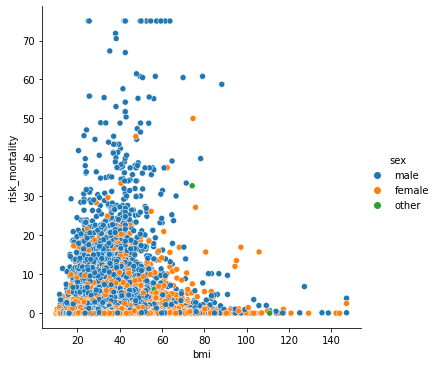

In [74]:
bmi_mortality = data[['bmi','risk_mortality','sex','risk_infection','age','covid19_positive']]
bmi_mortality = bmi_mortality.dropna()
sns.relplot(x='bmi', y='risk_mortality', hue='sex', data=bmi_mortality)
column_1 = bmi_mortality["bmi"]

column_2 = bmi_mortality["risk_mortality"]

correlation = column_1.corr(column_2)
correlation

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


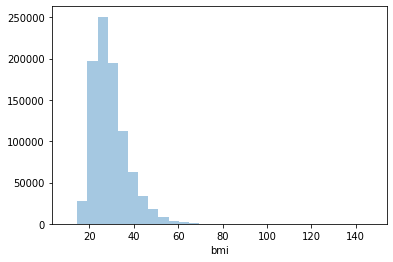

In [20]:
sns.distplot(bmi_mortality['bmi'], kde=False, bins=30);

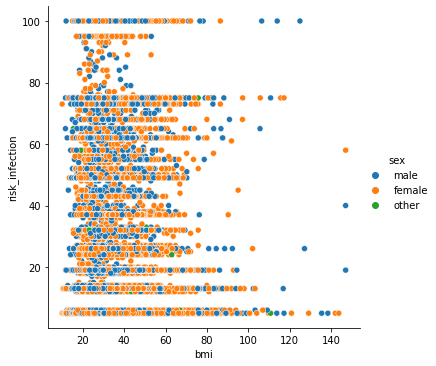

In [21]:
sns.relplot(x='bmi', y='risk_infection', hue='sex', data=bmi_mortality)

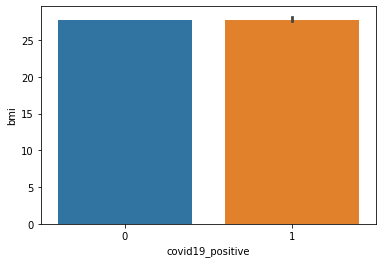

In [22]:
from numpy import median
sns.barplot(x='covid19_positive', y='bmi', data=bmi_mortality, estimator=median)

**Insight:** BMI and covid19_positive has very low correlation of 0.083, so we can't infer relation between them


## Income Vs Covid-19


*   H0 = Income and Covid-19 are independent
*   H1 = They are related in some way



In [95]:
data['income'].unique()

array([nan, 'low', 'med', 'high', 'gov', 'blank'], dtype=object)

In [96]:
incomePosi = data[['income','covid19_positive']]
incomePosi.head()

,income,covid19_positive
ID,,
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,NaN,0


In [97]:
incomePosi.isnull().sum()

income              688743
covid19_positive         0
dtype: int64

In [98]:
incomePosi = incomePosi.dropna()
incomePosi.head()

,income,covid19_positive
ID,,
47937,low,0
47938,med,0
47939,med,0
47940,high,0
47941,high,0


In [99]:
cln,clp,cmn,cpm,chn,chp =0,0,0,0,0,0
for i in range(len(incomePosi['income'])):
  if (incomePosi[i:i+1]['income'].str.contains("low")).bool() & ((incomePosi[i:i+1]['covid19_positive'] == 0).bool()):
    cln+=1
  elif (incomePosi[i:i+1]['income'].str.contains("low")).bool() & ((incomePosi[i:i+1]['covid19_positive'] == 1).bool()):
    clp+=1
  elif (incomePosi[i:i+1]['income'].str.contains("med")).bool() & ((incomePosi[i:i+1]['covid19_positive'] == 0).bool()):
    cmn+=1
  elif (incomePosi[i:i+1]['income'].str.contains("med")).bool() & ((incomePosi[i:i+1]['covid19_positive'] == 1).bool()):
    cpm+=1
  elif (incomePosi[i:i+1]['income'].str.contains("high")).bool() & ((incomePosi[i:i+1]['covid19_positive'] == 0).bool()):
    chn+=1
  elif (incomePosi[i:i+1]['income'].str.contains("high")).bool() & ((incomePosi[i:i+1]['covid19_positive'] == 1).bool()):
    chp+=1
incomeMatrix = pd.DataFrame(
    [
        [cln,clp],
        [cmn,cpm],
        [chn,chp]
    ],
    index=["Low income","Med income","High income"],
    columns=["Covid19_Negative","Covid19_Positive"])
incomeMatrix

,Covid19_Negative,Covid19_Positive
Low income,22539,232
Med income,110428,1094
High income,77612,693


In [100]:
from scipy.stats import chi2
chi, pval, dof, exp = chi2_contingency(incomeMatrix)
print('p-value is: ', pval)
significance = 0.01
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  0.054989533050271655
chi=5.801225, critical value=9.210340

At 0.01 level of significance, we accept the null hypotheses. 
They are independent.


In [101]:
def cramers_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
insurCramers_v = cramers_stat(incomeMatrix)
print("Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic")
insurCramers_v

Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic


0.005223724470229346

## Insurance Vs Covid-19


*   H0 = Insurance and Covid-19 are independent
*   H1 = They are related in some way



In [102]:
data['insurance'].unique()

array([nan, 'no', 'yes', 'blank'], dtype=object)

In [103]:
insurPosi = data[['insurance','covid19_positive']]
insurPosi.head()

,insurance,covid19_positive
ID,,
1,NaN,0
2,NaN,0
3,NaN,0
4,NaN,0
5,NaN,0


In [104]:
insurPosi.isnull().sum()

insurance           688743
covid19_positive         0
dtype: int64

In [105]:
insurPosi = insurPosi.dropna()
insurPosi.head()

,insurance,covid19_positive
ID,,
47937,no,0
47938,yes,0
47939,no,0
47940,yes,0
47941,yes,0


In [106]:
cnn,cnp,cpn,cpp =0,0,0,0
for i in range(len(insurPosi['insurance'])):
  if (insurPosi[i:i+1]['insurance'].str.contains("no")).bool() & ((insurPosi[i:i+1]['covid19_positive'] == 0).bool()):
    cnn+=1
  elif (insurPosi[i:i+1]['insurance'].str.contains("no")).bool() & ((insurPosi[i:i+1]['covid19_positive'] == 1).bool()):
    cnp+=1
  elif (insurPosi[i:i+1]['insurance'].str.contains("yes")).bool() & ((insurPosi[i:i+1]['covid19_positive'] == 0).bool()):
    cpn+=1
  elif (insurPosi[i:i+1]['insurance'].str.contains("yes")).bool() & ((insurPosi[i:i+1]['covid19_positive'] == 1).bool()):
    cpp+=1
insurMatrix = pd.DataFrame(
    [
        [cnn,cnp],
        [cpn,cpp]
    ],
    index=["No insurance","Has insurance"],
    columns=["Covid19_Negative","Covid19_Positive"])
insurMatrix

,Covid19_Negative,Covid19_Positive
No insurance,45553,446
Has insurance,159434,1480


In [107]:
chi2_contingency(insurMatrix)

(0.9103386540915883,
 0.3400245797942681,
 1,
 array([[ 45570.82934857,    428.17065143],
        [159416.17065143,   1497.82934857]]))

In [108]:
df=chi2_contingency(insurMatrix)[3]
pd.DataFrame(
    data=df[:,:], 
    index=["No insurance","Has insurance"],
    columns=["Covid19_Negative","Covid19_Positive"]
).round(2)

,Covid19_Negative,Covid19_Positive
No insurance,45570.83,428.17
Has insurance,159416.17,1497.83


In [109]:
chisquare=chi2_contingency(insurMatrix)[0]
chisquare

0.9103386540915883

In [110]:
p_value = chi2_contingency(insurMatrix)[1]
p_value

0.3400245797942681

In [111]:
from scipy.stats import chi2
chi, pval, dof, exp = chi2_contingency(insurMatrix)
print('p-value is: ', pval)
significance = 0.01
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  0.3400245797942681
chi=0.910339, critical value=6.634897

At 0.01 level of significance, we accept the null hypotheses. 
They are independent.


In [112]:
def cramers_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
insurCramers_v = cramers_stat(insurMatrix)
print("Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic")
insurCramers_v

Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic


0.00209752720879171

## Sex Vs Covid-19


*   H0 = Sex and Covid-19 are independent
*   H1 = They are related in some way



In [84]:
data['sex'].unique()

array(['male', 'female', 'other', 'undefined'], dtype=object)

In [85]:
insurPosi = data[['sex','covid19_positive']]
insurPosi.head()

,sex,covid19_positive
ID,,
1,male,0
2,female,0
3,male,0
4,male,0
5,male,0


In [86]:
insurPosi.isnull().sum()

sex                 0
covid19_positive    0
dtype: int64

In [87]:
cmn,cpm,cfn,cfp =0,0,0,0
for i in range(len(insurPosi['sex'])):
  if (insurPosi[i:i+1]['sex'].str.contains("female")).bool() & ((insurPosi[i:i+1]['covid19_positive'] == 0).bool()):
    cfn+=1
  elif (insurPosi[i:i+1]['sex'].str.contains("female")).bool() & ((insurPosi[i:i+1]['covid19_positive'] == 1).bool()):
    cfp+=1
  elif (insurPosi[i:i+1]['sex'].str.contains("male")).bool() & ((insurPosi[i:i+1]['covid19_positive'] == 0).bool()):
    cmn+=1
  elif (insurPosi[i:i+1]['sex'].str.contains("male")).bool() & ((insurPosi[i:i+1]['covid19_positive'] == 1).bool()):
    cpm+=1
  
insurMatrix = pd.DataFrame(
    [
        [cmn,cpm],
        [cfn,cfp]
    ],
    index=["Male","Female"],
    columns=["Covid19_Negative","Covid19_Positive"])
insurMatrix

,Covid19_Negative,Covid19_Positive
Male,321238,1758
Female,585017,1587


In [88]:
chi2_contingency(insurMatrix)

(425.262613661738,
 1.7457936909893287e-94,
 1,
 array([[321808.20138522,   1187.79861478],
        [584446.79861478,   2157.20138522]]))

In [89]:
df=chi2_contingency(insurMatrix)[3]
pd.DataFrame(
    data=df[:,:], 
    index=["Male","Female"],
    columns=["Covid19_Negative","Covid19_Positive"]
).round(2)

,Covid19_Negative,Covid19_Positive
Male,321808.2,1187.8
Female,584446.8,2157.2


In [90]:
chisquare=chi2_contingency(insurMatrix)[0]
chisquare

425.262613661738

In [91]:
p_value = chi2_contingency(insurMatrix)[1]
p_value

1.7457936909893287e-94

In [92]:
def cramers_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
insurCramers_v = cramers_stat(insurMatrix)
insurCramers_v

0.02162237405731346

In [93]:
from scipy.stats import chi2
chi, pval, dof, exp = chi2_contingency(insurMatrix)
print('p-value is: ', pval)
significance = 0.01
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  1.7457936909893287e-94
chi=425.262614, critical value=6.634897

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


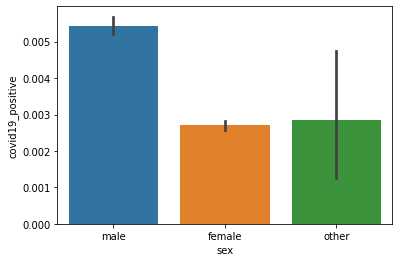

In [94]:
sns.barplot(y='covid19_positive', x ='sex',data=bmi_mortality)

## Sex vs Covid risk/mortality

*   H0 = Sex and Risk mortality are independent
*   H1 = They are related in some way

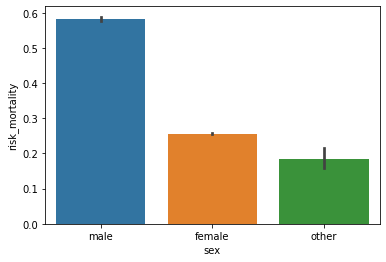

In [113]:
sns.barplot(x='sex', y='risk_mortality', data=bmi_mortality)

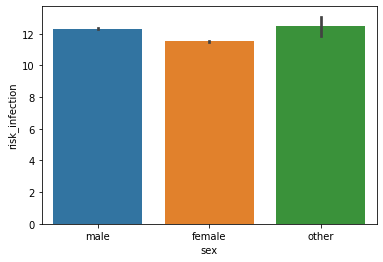

In [114]:
sns.barplot(x='sex', y='risk_infection', data=bmi_mortality)

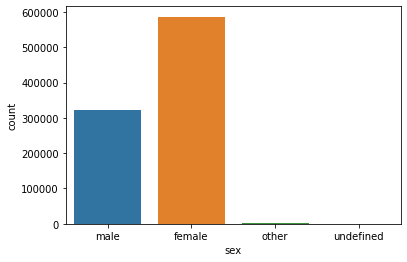

In [115]:
sns.countplot(x='sex',data=data)

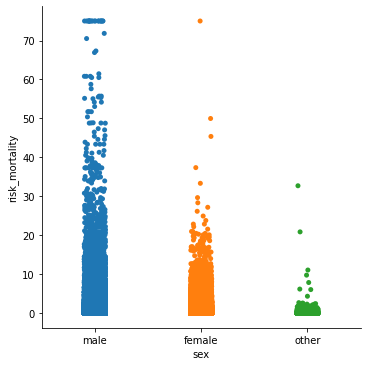

In [116]:
sns.catplot(x="sex", y="risk_mortality", data=bmi_mortality)

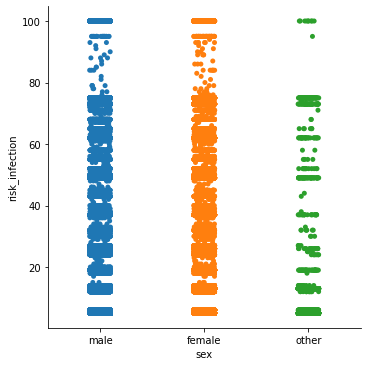

In [117]:
sns.catplot(x="sex", y="risk_infection", data=bmi_mortality)

In [118]:
stats.f_oneway(bmi_mortality['risk_infection'][bmi_mortality['sex'] == 'male'],
               bmi_mortality['risk_infection'][bmi_mortality['sex'] == 'female'],
               bmi_mortality['risk_infection'][bmi_mortality['sex'] == 'other'])

F_onewayResult(statistic=314.31011948544915, pvalue=3.4981118559002447e-137)

In [119]:
stats.f_oneway(bmi_mortality['risk_mortality'][bmi_mortality['sex'] == 'male'],
               bmi_mortality['risk_mortality'][bmi_mortality['sex'] == 'female'],
               bmi_mortality['risk_mortality'][bmi_mortality['sex'] == 'other'])

F_onewayResult(statistic=10104.56778742565, pvalue=0.0)

**Insight:** Risk Mortality and Sex has very low p-value<'0.01', so we reject null hypothesis that they are independent.

Risk Mortality and Sex has very low p-value<'0.01', so we reject null hypothesis that they are independent.

## Contacts count Vs Covid-19


*   H0 = Contacts count and Covid-19 are independent
*   H1 = They are related in some way



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


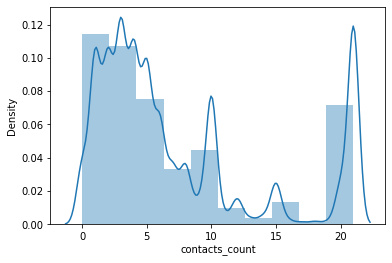

In [120]:
sns.distplot(data['contacts_count'],bins=10)

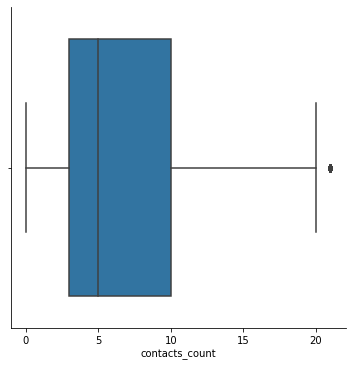

In [121]:
sns.catplot(x='contacts_count',kind='box',data=data)

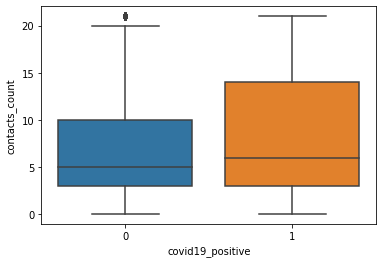

In [122]:
df = data[["contacts_count","covid19_positive"]]
df=df.dropna()
sns.boxplot(x ='covid19_positive', y ='contacts_count', data = df) 

In [123]:
confusion_matrix = pd.crosstab(df['covid19_positive'], df['contacts_count'])
confusion_matrix

contacts_count,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
covid19_positive,,,,,,,,,,,,,,,,,,,,,,
0,33114,94550,89937,108674,95232,86631,57054,30747,32553,11100,73625,4676,14439,3212,4314,23596,2208,1287,1652,1500,21303,113809
1,133,261,271,300,325,343,184,85,123,50,313,14,57,19,18,91,18,1,9,20,193,480


In [124]:
from scipy.stats import chi2
chi, pval, dof, exp = chi2_contingency(confusion_matrix)
print('p-value is: ', pval)
significance = 0.01
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  9.537846249159013e-55
chi=317.281434, critical value=38.932173

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


In [125]:
def cramers_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
insurCramers_v = cramers_stat(confusion_matrix)
print("Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic")
insurCramers_v

Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic


0.01868765658265211

## Age Vs Covid-19


*   H0 = Age and Covid-19 are independent
*   H1 = They are related in some way



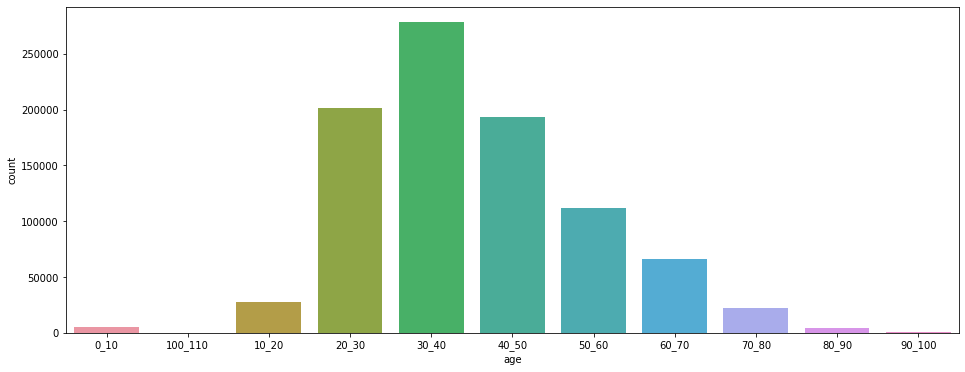

In [126]:
df = data[["covid19_positive","age"]]
df=df.dropna()
df = df.sort_values('age')
plt.figure(figsize=(16, 6))
sns.countplot(x='age',data=df)

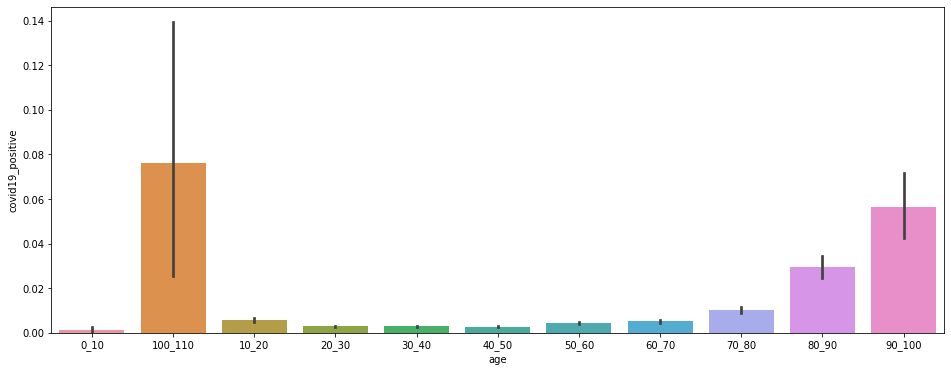

In [127]:
plt.figure(figsize=(16, 6))
sns.barplot(x ='age', y ='covid19_positive', data = df)

In [128]:
confusion_matrix = pd.crosstab(df['covid19_positive'], df['age'])
confusion_matrix

age,0_10,100_110,10_20,20_30,30_40,40_50,50_60,60_70,70_80,80_90,90_100
covid19_positive,,,,,,,,,,,
0,5579,73,27561,200984,277466,193011,111512,65645,22327,4383,868
1,8,6,161,608,801,528,489,338,230,133,52


In [129]:
from scipy.stats import chi2
chi, pval, dof, exp = chi2_contingency(confusion_matrix)
print('p-value is: ', pval)
significance = 0.01
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  0.0
chi=2110.120625, critical value=23.209251

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


In [130]:
def cramers_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
insurCramers_v = cramers_stat(confusion_matrix)
print("Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic")
insurCramers_v

Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic


0.04808112577083457

## Blood type Vs Covid-19


*   H0 = Blood type and Covid-19 are independent
*   H1 = They are related in some way



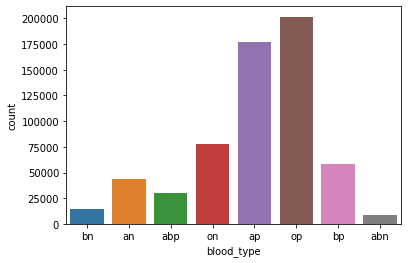

In [131]:
df = data[["covid19_positive","blood_type"]]
df=df.dropna()
df = df[df["blood_type"] != "unknown"]
df = df[df["blood_type"] != "undefined"]
sns.countplot(x='blood_type',data=df)

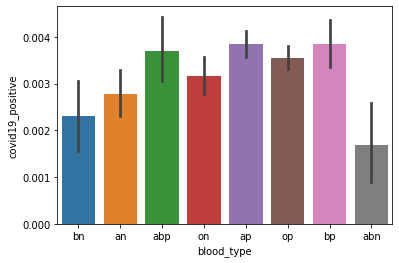

In [132]:
sns.barplot(x ='blood_type', y ='covid19_positive', data = df)

In [133]:
confusion_matrix = pd.crosstab(df['covid19_positive'], df['blood_type'])
confusion_matrix

blood_type,abn,abp,an,ap,bn,bp,on,op
covid19_positive,,,,,,,,
0,8902,30361,44007,176100,14701,58523,77741,200859
1,15,113,123,680,34,226,247,717


In [134]:
from scipy.stats import chi2
chi, pval, dof, exp = chi2_contingency(confusion_matrix)
print('p-value is: ', pval)
significance = 0.01
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  4.25816213574962e-05
chi=31.889247, critical value=18.475307

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


In [135]:
def cramers_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
insurCramers_v = cramers_stat(confusion_matrix)
print("Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic")
insurCramers_v

Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. It is based on Pearson's chi-squared statistic


0.007210548491075127

## Working Vs Covid-19


*   H0 = Working and Covid-19 are independent
*   H1 = They are related in some way



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


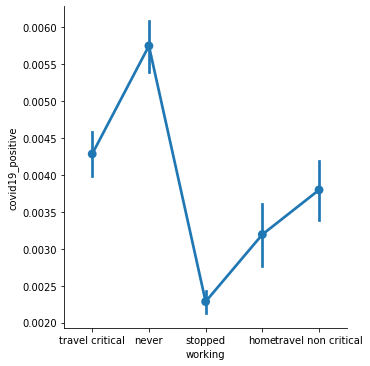

In [136]:
df = data[["working","covid19_positive"]]
df=df.dropna()
sns.factorplot(x ="working", y ="covid19_positive", data = df); 

In [137]:
confusion_matrix = pd.crosstab(df['covid19_positive'], df['working'])
confusion_matrix

working,home,never,stopped,travel critical,travel non critical
covid19_positive,,,,,
0,66193,177287,363736,211389,86619
1,212,1024,833,909,330


In [138]:
from scipy.stats import chi2
chi, pval, dof, exp = chi2_contingency(confusion_matrix)
print('p-value is: ', pval)
significance = 0.01
p = 1 - significance
critical_value = chi2.ppf(p, dof)
print('chi=%.6f, critical value=%.6f\n' % (chi, critical_value))
if chi > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

p-value is:  8.227975223320316e-92
chi=430.212116, critical value=13.276704

At 0.01 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


In [140]:
def cramers_stat(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
insurCramers_v = cramers_stat(confusion_matrix)
print("Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. \nIt is based on Pearson's chi-squared statistic")
insurCramers_v

Cramér's V is a number between 0 and 1 that indicates how strongly two categorical variables are associated. 
It is based on Pearson's chi-squared statistic


0.021760616953383376